In [9]:
import torch

from script.Networks import ICNN, SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn
from script.eval import Plots_for
from script.Verification import verification

In [10]:
sequential = False
epochs = 1
batch_size = 1
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]
if not sequential:
    icnn = ICNN([2, 10, 10, 1])
else:
    icnn = SequentialNN([2, 10, 10, 1])

In [11]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

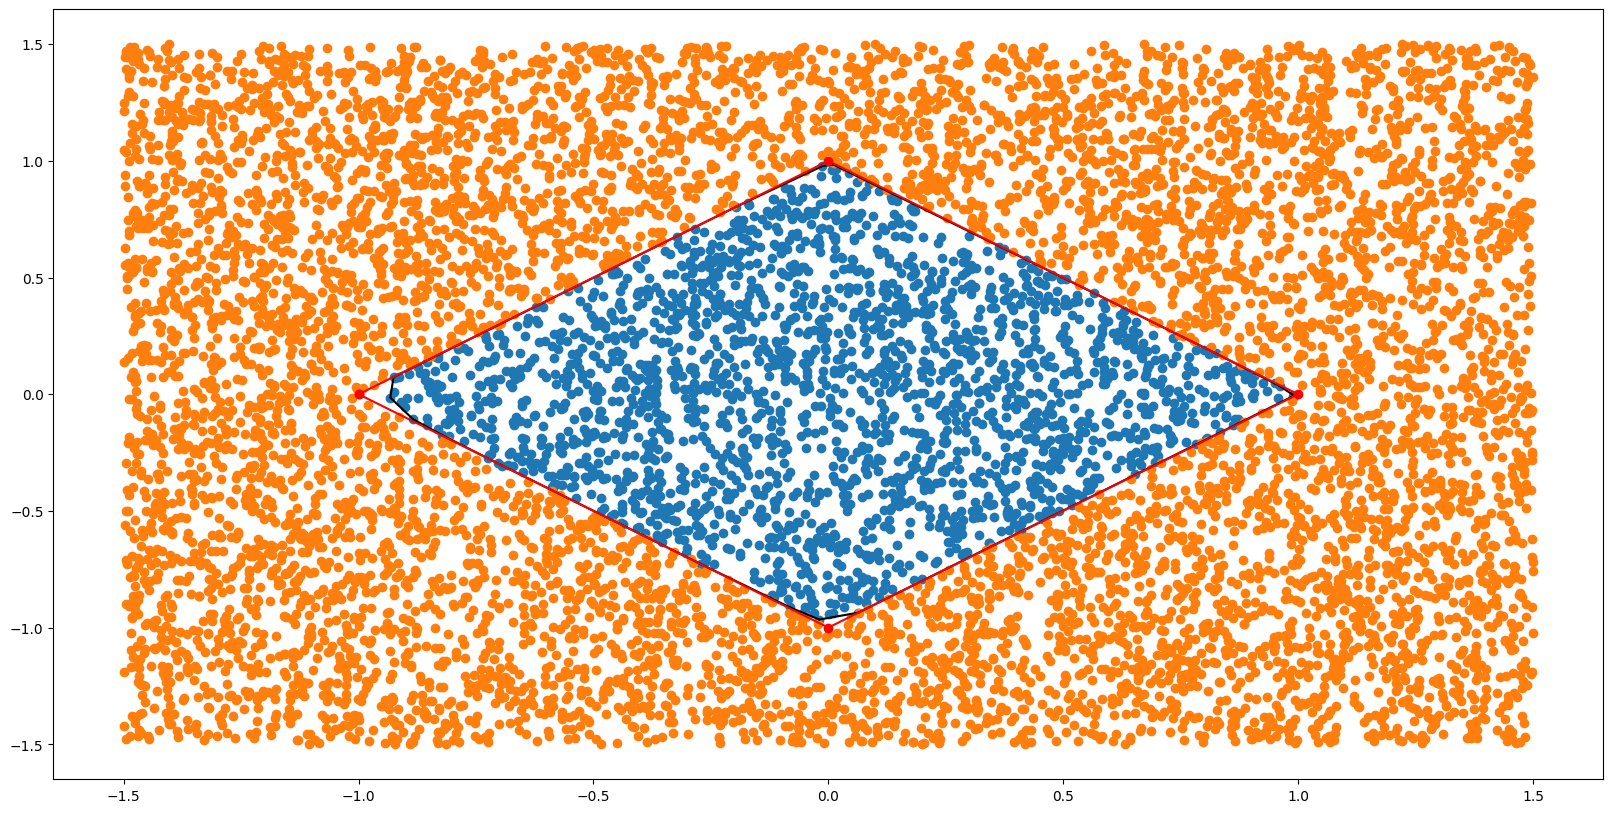

In [12]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range)
plots.plt_initial()


In [13]:
history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, sequential=sequential, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 0.5790476843674988
batch = 100, mean loss = 0.6925388655083327
batch = 200, mean loss = 0.6702347494508284
batch = 300, mean loss = 0.6465000357119457
batch = 400, mean loss = 0.6276519256171563
batch = 500, mean loss = 0.6145125943230745
batch = 600, mean loss = 0.5988829207971695
batch = 700, mean loss = 0.5833723003480975
batch = 800, mean loss = 0.5706090042749659
batch = 900, mean loss = 0.5580580836763294
batch = 1000, mean loss = 0.5456967706170126
batch = 1100, mean loss = 0.5333181676778908
batch = 1200, mean loss = 0.5217898790027261
batch = 1300, mean loss = 0.5108713808097939
batch = 1400, mean loss = 0.5010185018906224
batch = 1500, mean loss = 0.49072486643658214
batch = 1600, mean loss = 0.48132063086686333
batch = 1700, mean loss = 0.47191449715682565
batch = 1800, mean loss = 0.4634629669015627
batch = 1900, mean loss = 0.45462430778312646
batch = 2000, mean loss = 0.4465677502091347
batch = 2100, mean loss = 0.43825309673073126
b

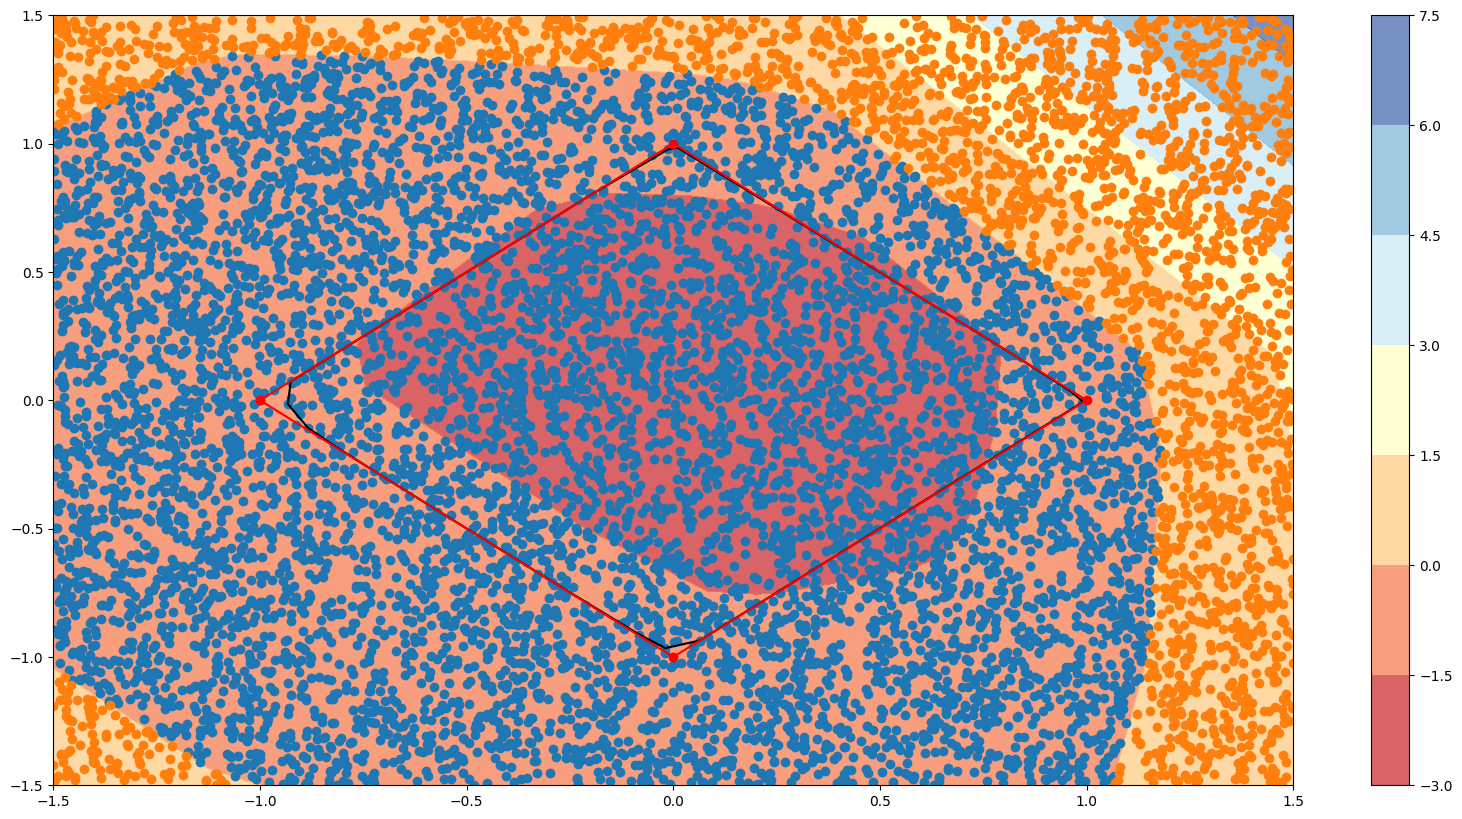

In [14]:
plots.plt_mesh()

In [15]:
result = verification(icnn, sequential)

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 138 rows, 96 columns and 389 nonzeros
Model fingerprint: 0x77a24421
Variable types: 76 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [5e-05, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+01]
  RHS range        [4e-02, 1e+01]
Presolve removed 77 rows and 52 columns
Presolve time: 0.00s
Presolved: 61 rows, 44 columns, 242 nonzeros
Variable types: 29 continuous, 15 integer (15 binary)
Found heuristic solution: objective -1.4553848

Root relaxation: objective 3.537624e+00, 36 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    3.53762    0 

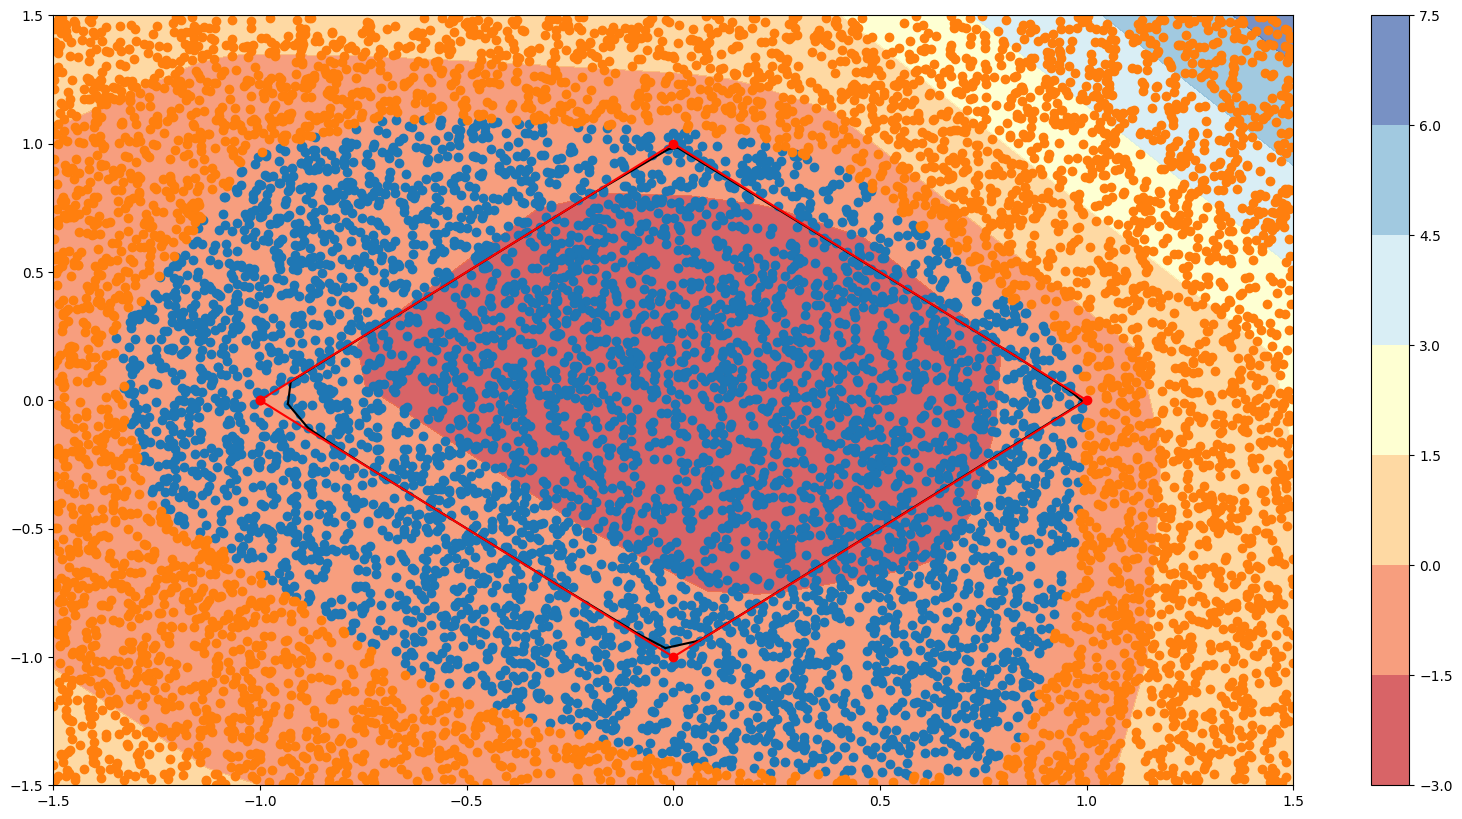

In [16]:
plots.c = result
plots.plt_mesh()
